## 딥러닝 자연어 처리

자연어 처리 (Natural Language Processing : NLP)
- 음성이나 텍스트를 컴퓨터가 인식하고 처리하는 것

    - 컴퓨터를 이용해서 인간의 언어를 알아 듣는 연구는 딥러닝 이전부터 지속
    - 딥러닝이 등장하면서 자연어 처리 연구 활발
    - 대용량 데이터를 이용해 자연어 데이터를 지속적으로 입력해 끊임 없이 학습하는 것이 가능해졌기 때문

자연어 처리
- 텍스트 자료를 딥러닝에 그대로 입력할 수 없음
- 컴퓨터 알고리즘은 수치로 된 데이터만 이해할 뿐 텍스트를 이해할 수 없기 때문
- 텍스트를 정제하는 전처리 과정 필요

텍스트 전처리 작업

토큰화(Tokenization)
- 토큰(token)이라 불리는 단위로 나누는 작업. 단어 토크화

정제(Cleaning) : 노이즈 데이터 제거
    
정규화(Normalization) : 표현 방법이 다른 단어들을 통합시켜서 같은 단어로 만듦
    
어간 추출(Stemming) and 표제어 추출(Lemmatization)
- 하나의 단어로 일반화시켜서 문서 내의 단어 수를 줄이는 작업

불용어(Stopword) 제거
- 문장에서는 자주 등장하지만 실제 의미 분석을 하는데는 거의 기여하는 바가 없는 단어 제거

정규 표현식(Regular Expression)
- 특정 규칙이 있는 텍스트 데이터를 빠르게 정제

정수 인코딩(Integer Encoding)
- 각 단어를 고유한 정수에 맵핑(mapping) 
- (index 부여)

패딩(Padding)
- 여러 문장의 길이를 임의로 동일하게 맞춰주는 작업
- 하나의 행렬로 보고, 한꺼번에 묶어서 처리

원-핫 인코딩(One-Hot Encoding): 문자를 숫자로 변환

텍스트 토큰화  

토큰화(tokenization) : 입력된 텍스트를 잘게 나누는 과정  
        
토큰(token)
- 작게 나누어진 하나의 단위
- 단어, 문장, 형태소 등 

In [1]:
# 케라스의 text_to_word_sequence() 함수 사용 
# 텍스트 토큰화

from tensorflow.keras.preprocessing.text import text_to_word_sequence



['해보지', '않으면', '해낼', '수', '없다']


단어의 빈도수 확인
- 각 단어가 몇 번이나 중복해서 쓰였는지 확인
- 단어의 빈도 수를 알면 텍스트에서 중요한 역할을 하는 단어를 파악할 수 있음

In [1]:
# 케라스의 Tokenizer() 클래스를 사용해서 빈도 수 계산
from tensorflow.keras.preprocessing.text import Tokenizer

docs = ['먼저 텍스트의 각 단어를 나누어 토큰화 합니다.',
       '텍스트의 단어로 토큰화 해야 딥러닝에서 인식됩니다.',
       '토큰화 한 결과는 딥러닝에서 사용 할 수 있습니다.',
       ]



#### word_counts와 word_docs
- word_counts : 단어의 빈도수
- word_docs : 몇개의 문장에 나오는가

In [5]:
docs = ['먼저 텍스트의 각 단어를 나누어 토큰화 합니다.',
       '텍스트의 단어로 토큰화 해야 딥러닝에서 인식됩니다.',
       '토큰화 한 결과는 딥러닝에서 사용 할 수 있습니다.',
       ]

#### 빈도수와 다르게 출력하기 위해 '단어를' 한 번 더 추가하고 비교

- 빈도수 : ('단어를', 2)
- 소속 문장 수 : '단어를': 1   
    - (한 문장에 두 번 포함되어 있음)  

**두 번째 '단어를' 지우고 원위치할 것*

In [8]:
docs = ['먼저 텍스트의 각 단어를 나누어 토큰화 합니다.',
       '텍스트의 단어로 토큰화 해야 딥러닝에서 인식됩니다.',
       '토큰화 한 결과는 딥러닝에서 사용 할 수 있습니다.',
       ]

token = Tokenizer()            # 토큰화 객체 생성
token.fit_on_texts(docs)       # 문장 적용
print(token.word_counts)
print('\n',token.word_docs)

OrderedDict([('먼저', 1), ('텍스트의', 2), ('각', 1), ('단어를', 1), ('나누어', 1), ('토큰화', 3), ('합니다', 1), ('단어로', 1), ('해야', 1), ('딥러닝에서', 2), ('인식됩니다', 1), ('한', 1), ('결과는', 1), ('사용', 1), ('할', 1), ('수', 1), ('있습니다', 1)])

 defaultdict(<class 'int'>, {'합니다': 1, '각': 1, '단어를': 1, '나누어': 1, '먼저': 1, '토큰화': 3, '텍스트의': 2, '단어로': 1, '해야': 1, '딥러닝에서': 2, '인식됩니다': 1, '사용': 1, '결과는': 1, '수': 1, '있습니다': 1, '할': 1, '한': 1})


- 각 단어에 매겨진 인덱스 값을 출력
    - word_index

### 단어의 원-핫 인코딩

#### 단어의 원-핫 인코딩
- 먼저 벡터 공간을 0으로 채우고
- index에 해당되는 값만 1로 변경

**원-핫 인코딩 전에 각 단어에 index 부여 수행**

In [10]:
from tensorflow.keras.preprocessing.text import Tokenizer

text = '오랫동안 꿈꾸는 이는 그 꿈을 닮아간다'

token = Tokenizer()            # 토큰화 객체 생성
token.fit_on_texts([text])  
token.word_index  # 각 단어와 인덱스 확인

{'오랫동안': 1, '꿈꾸는': 2, '이는': 3, '그': 4, '꿈을': 5, '닮아간다': 6}

* texts_to_sequences 함수를 이용해 원래 text의 토큰화된 단어들을 배열의 인덱스로 바꿔줄 때

- 예를 들어 위 코드의 경우 text의 단어가6개이니 [1, 2, 3, 4, 5, 6]로 나온다.

- 이때 0부터 시작하지 않는이유는 **배열의 맨 앞에 인덱스 0이 생략되어 출력**되는 것이다 : 뒤에 embedding시 전체 단어수에 +1을 해야하는 이유

In [2]:
# 원-핫 인코딩 수행
# to_categorical() 함수 사용

# from tensorflow.keras import utils
from tensorflow.keras.utils import to_categorical


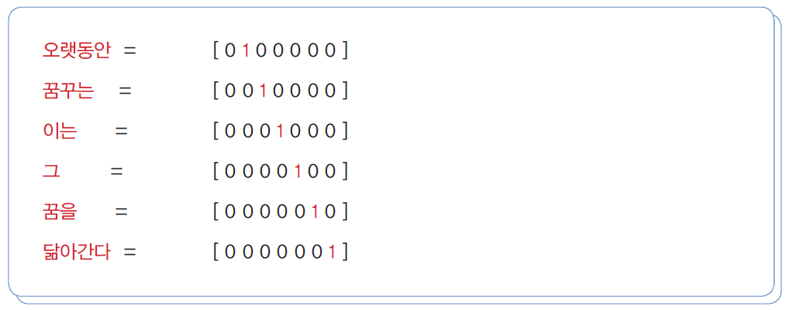

원-핫 인코딩의 문제
- 원-핫 인코딩을 그대로 사용하면 벡터 길이가 너무 길어진다는 단점
- 예로 1만 개의 단어 토큰으로 이루어진 말뭉치(Corpus)를 다룬다고 할 때
- 원-핫 인코딩을 적용하여 벡터화할 경우 
- 단어의 의미를 전혀 고려하지 않고
- 9,999개의 0과 하나의 1로 이루어진 벡터를 1만개 만들어야 함
- 공간적 낭비

#### 원 핫 인코딩의 대안
말뭉치(Corpus)
- 자연어 연구를 위해 특정한 목적을 가지고 언어의 표본을 추출한 집합

밀집 표현(Dense Representation)
- 사용자가 설정한 값으로 모든 단어의 벡터 표현의 차원을 맞춤
- 이 과정에서 더 이상 0과 1만 가진 값이 아니라 실수값을 가지게 됨  
- 예:   
    강아지 = [0 0 0 1 ......0] # 10,000 차원  
    밀집 표현으로 변경  
    강아지 = [0.2 1.8 1.1 .... ] # 128차원  
    벡터의 차원이 조밀해졌다고 해서 밀집 벡터(dense bector)라고 함  

단어 임베딩 (word embedding)
- 공간적 낭비를 해결하기 위한 방법으로
- 단어의 의미를 고려하고 밀집 벡터(dense vector)의 형태로 표현 - 유사도계산
- 의미가 비슷한 단어는 비슷한 방향에 위치
- 단어의 의미를 효과적으로 표현하기 때문에 
- 원-핫 인코딩보다 학습 성능을 높일 수 있음
- 주어진 배열을 정해진 길이로 압축  

예 : 단어 happy는 bad 보다 good에 더 가깝고  
    cat은 good 보다는 dog에 가깝다는 것을 고려하여  
    배열을 새로운 수치로 변경   

### 단어 임베딩

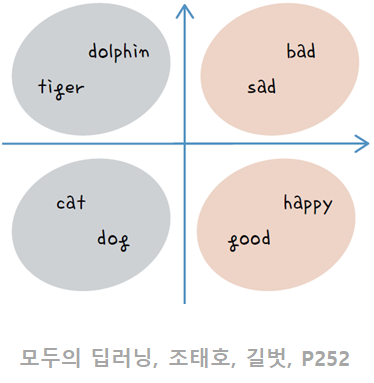

#### 단어 임베딩을 만드는 두가지 방법  

1. (문서 분류나 감성 예측과 같은) 관심 대상인 문제와 함께 단어 임베딩을 학습
    * 이런 경우에는 랜덤한 단어 벡터로 시작해서 신경망의 가중치를 학습하는 것과 같은 방식으로 단어 벡터를 학습함
2. 풀려는 문제가 아니고 다른 머신 러닝 작업에서 미리 계산된 단어 임베딩을 로드. 이를 사전 훈련된 단어 임베딩이라고 함

#### 케라스의 Embeddong 클래스 사용  
- Embedding(총 단어수(단어 집합의 크기),임베딩 후 출력되는 벡터 크기,iput_length(각 입력 시퀀스 길이))  
- Embedding(16, 4, input_length=2)  
- **입력될 총 단어수는 16, 임베딩 후 출력되는 벡터크기는 4, 한번에 입력되는 단어는 2개씩만 입력**

##### 임베딩층  
- model = Sequential()  
- model.add(Embedding(word_size, 8, input_length=4))  

##### 단어 → 단어에 부여된 고유한 정수값 → 임베딩 층 통과 → 밀집 벡터  

- 임베딩 층
    - 입력 정수에 대해 밀집 벡터(dense vector)로 맵핑하고 
    - 밀집 벡터는 인공 신경망의 학습 과정에서 가중치가 학습되는 것과 같은 방식으로 훈련
    - 훈련 과정에서 단어는 모델이 풀고자하는 작업에 맞는 값으로 업데이트 됨
    - 그리고 이 밀집 벡터를 임베딩 벡터라고 함  

Embedding 층의 출력 크기  

Embedding(16, 4, input_length=2)의 경우  
출력 크기 : (16, 2, 4) : 3D 실수형 텐서를 반환  

3D 임베딩 텐서를 (16, 2*4) 크기의 2D 텐서로 펼치기 위해  
Flatten 층 추가  
model.add(Flatten())  

### 패딩 (Padding) 

패딩(Padding)
- 문장의 길이를 나타내는 배열의 크기를 동일하게 맞추는 작업
- 길이가 전부 동일한 문서들에 대하여 하나의 행렬로 인식하고
- 한꺼번에 묶어서 처리
- 각 문장(문서)의 길이가 서로 다른 경우 
- 동일한 길이로 맞추로 빈 부분은 0으로 채움

In [3]:
from tensorflow.keras.preprocessing.text import Tokenizer

sentences = ["지금은 딥러닝을 공부하고 있어요", "어렵지 않고 쉬워요", "참 재미있어요"]


### 자연처 처리 예제 (embeddings 사용)

텍스트를 읽고 긍정, 부정 예측하기
- 영화 리뷰를 딥러닝 모델로 학습해서
- 각 리뷰가 긍정적인지 부정적인지 예측

예측 과정  
(1) 짧은 리뷰 10개를 불러와  
    - 긍정적이면 1, 부정적이면 0이라는 클래스로 지정    
(2) 토큰화  
(3) 패딩 (padding)   
(4) 임베딩 및 딥러닝  


In [18]:
import numpy
import tensorflow as tf
from numpy import array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Embedding
from tensorflow.keras.preprocessing.text import text_to_word_sequence

In [19]:
# (1) 짧은 리뷰 10개를 불러와
# - 긍정적이면 1, 부정적이면 0이라는 클래스로 지정

docs = ["너무 재밌네요","최고예요","참 잘 만든 영화예요", \
        "추천하고 싶은 영화입니다","한번 더 보고싶네요","글쎄요", \
        "별로예요","생각보다 지루하네요","연기가 어색해요","재미없어요"]

# 긍정 리뷰는 1, 부정 리뷰는 0으로 클래스 지정
classes = array([1,1,1,1,1,0,0,0,0,0])

### 참고 
* texts_to_sequences 함수를 이용해 원래 text의 토큰화된 단어들을 배열의 인덱스로 바꿔줄 때

- 예를 들어 위 코드의 경우 text의 단어가6개이니 [1, 2, 3, 4, 5, 6]로 나온다.

- 이때 0부터 시작하지 않는이유는 **배열의 맨 앞에 인덱스 0이 생략되어 출력**되는 것이다 : 뒤에 embedding시 전체 단어수에 +1을 해야하는 이유